In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
sns.set_style("darkgrid")

In [3]:
# Dataset
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
dataset.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
# sns.pairplot(dataset)

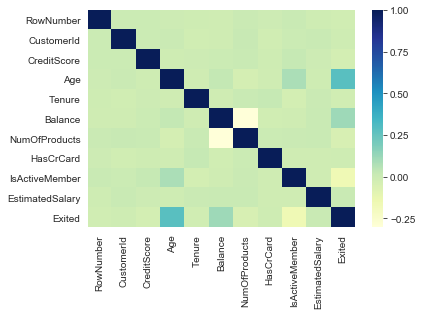

In [8]:
# Corr heatmap
sns.heatmap(dataset.corr(), cmap="YlGnBu")

In [9]:
# sns.distplot(dataset['Price'])
# sns.kdeplot(dataset['Price'])
# sns.jointplot(x='Price', y='Area Population', data=dataset, kind='hex')
# sns.jointplot(x='Price', y='Avg. Area Income', data=dataset, kind='reg')
# dataset.columns

In [10]:
# X
X = dataset.iloc[:,3:-1].values
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [11]:
# y
y = dataset.iloc[:,-1].values
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [12]:
# Categorical Encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:]

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [14]:
# Splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [15]:
# Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
# Lib for ANN
from keras.layers import Dense
from keras.models import Sequential

C:\Users\Lenovo\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [17]:
# Classifier
classifier = Sequential()

In [18]:
# NN
classifier.add(Dense(6, activation = 'relu', input_shape = (11,)))
classifier.add(Dense(6, activation = 'relu'))
classifier.add(Dense(1, activation = 'sigmoid'))

In [19]:
# NN algo
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [20]:
# NN processing
classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 100)

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/100
8000/8000 [==============================] - 3s 390us/step - loss: 0.5227 - acc: 0.7509
Epoch 2/100
8000/8000 [==============================] - 1s 134us/step - loss: 0.4371 - acc: 0.8091
Epoch 3/100
8000/8000 [==============================] - 1s 131us/step - loss: 0.4195 - acc: 0.8180
Epoch 4/100
8000/8000 [==============================] - 1s 132us/step - loss: 0.4043 - acc: 0.8244
Epoch 5/100
8000/8000 [==============================] - 1s 131us/step - loss: 0.3843 - acc: 0.8379
Epoch 6/100
8000/8000 [==============================] - 1s 133us/step - loss: 0.3671 - acc: 0.8489
Epoch 7/100
8000/8000 [==============================] - 1s 132us/step - loss: 0.3567 - acc: 0.8545
Epoch 8/100
8000/8000 [==============================] - 1s 133us/step - loss: 0.3514 - acc: 0.8564
Epoch 9/100
8000/8000 [==============================] - 1s 133us/step - loss: 0.3474 - acc: 0.8579
Epoch 10/100
8000/8000 [==============================] - 1s 132us/step - loss: 0.3430 - acc: 0.8604

8000/8000 [==============================] - 1s 150us/step - loss: 0.3281 - acc: 0.8659
Epoch 83/100
8000/8000 [==============================] - 1s 157us/step - loss: 0.3280 - acc: 0.8642
Epoch 84/100
8000/8000 [==============================] - 1s 158us/step - loss: 0.3281 - acc: 0.8645
Epoch 85/100
8000/8000 [==============================] - 1s 155us/step - loss: 0.3284 - acc: 0.8629
Epoch 86/100
8000/8000 [==============================] - 1s 155us/step - loss: 0.3283 - acc: 0.8627
Epoch 87/100
8000/8000 [==============================] - 1s 159us/step - loss: 0.3284 - acc: 0.8644
Epoch 88/100
8000/8000 [==============================] - 1s 160us/step - loss: 0.3273 - acc: 0.8639
Epoch 89/100
8000/8000 [==============================] - 2s 193us/step - loss: 0.3281 - acc: 0.8635
Epoch 90/100
8000/8000 [==============================] - 1s 177us/step - loss: 0.3280 - acc: 0.8645
Epoch 91/100
8000/8000 [==============================] - 1s 178us/step - loss: 0.3282 - acc: 0.8637
Epo

In [26]:
# y prediction probability
y_pred = classifier.predict(X_test)
y_pred

array([[0.04177927],
       [0.02208143],
       [0.6219241 ],
       ...,
       [0.02723318],
       [0.13776444],
       [0.65142703]], dtype=float32)

In [22]:
# Binary y prediction
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

In [24]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1508,   69],
       [ 195,  228]], dtype=int64)

In [37]:
(1508+228)/2000

0.868